In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [54]:
dados_vendas_censo = pd.read_csv('../input/dados-vendas-censo/dados_vendas_censo.csv')
dados_vendas_censo

In [44]:
dados_vendas_censo.info()

In [11]:
!pip install geopandas

In [14]:
import geopandas as gpd

In [15]:
setor_censo = gpd.read_file('../input/sp-s-censitarios/35SEE250GC_SIR.shp')

In [21]:
# Buscando um ponto de longitude e latitude na base de dados dos poligonos censitários
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == 'SÃO PAULO']
setor_censo_sp[setor_censo_sp.contains(Point(longitude, latitude))]

In [17]:
from shapely.geometry import Point
latitude = -23.56
longitude = -46.59
Point(longitude, latitude)

In [22]:
mapa_sp = setor_censo[setor_censo.NM_MUNICIP == 'SÃO PAULO'].reset_index(drop=True)
ax2 = mapa_sp.plot(figsize=(10,8))
ax2.set_title('Setores censitários - SÃO PAULO');

In [23]:
# Convertendo para EPSG: 3857

sp_street_map = mapa_sp.to_crs('epsg:3857')

In [29]:
!pip install folium

In [32]:
# Importando o Folium

from folium import Choropleth, Marker
from folium.plugins import MarkerCluster
from folium.plugins import StripePattern

In [36]:
import folium
center = [-23.60, -46.6]

In [34]:
import folium 
from folium.plugins import StripePattern
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

Mesmo seguindo o artigo da Creditas, eu não consegui fazer um mapa igual. Pesquisando a razão do possível erro, descobri que o tipo 'setor_censo' deveria ser equivalente a 'feature' do arquivo GeoJson 'sp_city'. Ao verificar como o 'setor_censo' estava sendo aprentado no DataFrame, era na forma de notação científica, por isso passei a variável para o formato 'Int64' para suportar os 15 dígitos.

In [ ]:
dados_vendas_censo.setor_censo

In [55]:
dados_vendas_censo['setor_censo'] = dados_vendas_censo['setor_censo'].astype(pd.Int64Dtype())

In [58]:
dados_vendas_censo.setor_censo

Mesmo com essa mudança, o mapa da cidade de São Paulo ainda ficava cinza. Ao pesquisar, novamente, o que poderia estar causando este resultado, algum fórum sugeria que a variável 'setor_censo' deveria estar na forma de 'object', já que no arquivo GeoJson as features estavam com este tipo. Por isso, transformei a coluna do DataFrame em 'str' e caso não houvesse nenhum registro, a linha seria preenchida com um espaço vazio.

In [78]:
dados_vendas_censo['setor_censo'] = dados_vendas_censo['setor_censo'].astype(str).replace('<NA>','')

In [27]:
sp_city = setor_censo_sp.__geo_interface__

In [86]:
# Create the map
m_stamen_2 = folium.Map(location=center, 
                 tiles='Stamen Toner', zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=sp_city, 
           data=dados_vendas_censo, 
           columns=['setor_censo', 'V005'],
           key_on="feature.properties.CD_GEOCODI", 
           fill_color='PuRd',
           fill_opacity=0.5,
           legend_name='Renda Média'
          ).add_to(m_stamen_2)

# Display the map
m_stamen_2

In [87]:
m_anuncio = folium.Map(location=center, 
                 tiles='Stamen Toner', zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=sp_city, 
           data=dados_vendas_censo, 
           columns=['setor_censo', 'Valor_m2'],
           key_on="feature.properties.CD_GEOCODI", 
           fill_color='PuRd',
           fill_opacity=0.5,
           legend_name='Valor do metro quadrado'
          ).add_to(m_anuncio)

# Display the map
m_anuncio

O dataset anterior tinha 5605 linhas, porém o dataset desenvolvido durante a aula tinha 8520 linhas. Por isso, farei os mapas novamente com o 'novo' dataset.

In [99]:
dados_aula4 = pd.read_csv('../input/dados-aula4/dados_aula4.csv', sep=';')
dados_aula4

In [101]:
dados_aula4['setor_censo'] = dados_aula4['setor_censo'].astype(pd.Int64Dtype())

In [105]:
dados_aula4['setor_censo'] = dados_aula4['setor_censo'].astype(str).replace('<NA>','')

In [106]:
m_aula4 = folium.Map(location=center, 
                 tiles='Stamen Toner', zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=sp_city, 
           data=dados_aula4, 
           columns=['setor_censo', 'V005'],
           key_on="feature.properties.CD_GEOCODI", 
           fill_color='YlOrRd',
           fill_opacity=0.5,
           legend_name='Renda Média'
          ).add_to(m_aula4)

# Display the map
m_aula4

In [110]:
m_aula4_imovel = folium.Map(location=center, 
                 tiles='Stamen Toner', zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=sp_city, 
           data=dados_aula4, 
           columns=['setor_censo', 'Valor_anuncio_float'],
           key_on="feature.properties.CD_GEOCODI", 
           fill_color='YlOrRd',
           fill_opacity=0.5,
           legend_name='Valor anúncio do imóvel'
          ).add_to(m_aula4_imovel)

# Display the map
m_aula4_imovel

In [112]:
m_aula4_metro = folium.Map(location=center, 
                 tiles='Stamen Toner', zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=sp_city, 
           data=dados_aula4, 
           columns=['setor_censo', 'Valor_m2'],
           key_on="feature.properties.CD_GEOCODI", 
           fill_color='PuRd',
           fill_opacity=0.5,
           legend_name='Valor do metro quadrado'
          ).add_to(m_aula4_metro)

# Display the map
m_aula4_metro

Considerando que a maioria dos setores censitários não está presente nos dois datasets usados para fazer os mapas, muitos locais não entraram nos mapas.
Aparentemente, houve pequenas diferenças entre os mapas elaborados, por exemplo o mapa com o valor do metro quadrado:
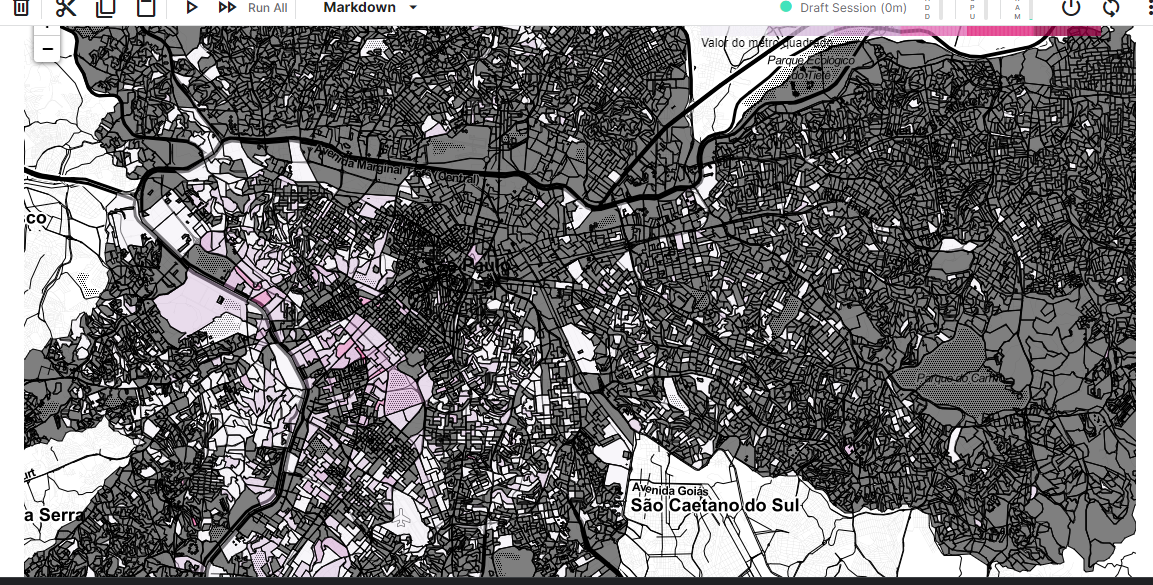
Coparando esta imagem com o mapa feito acima, é possível identificar que alguns setores censitarios, que antes estavam em branco, receberam algum valor em 'Valor_m2'